In [1]:
#import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path =r'C:\Users\jadep\Documents\Career Foundry\Achievement 6\Human Trafficking'

In [3]:
df = pd.read_csv(os.path.join(path, 'Data', 'victims_and_exploits.csv'),index_col=False)

In [4]:
#remove "total" row
df=df[:31]

In [6]:
df.head()

Unnamed: 0 citizenship  female  male  grand total  total victims  \
0           0          AF       0    97           97             97   
1           1          AL      22     0           22             22   
2           2          BG     342     0          342            116   
3           3          BY     523   940         1463            822   
4           4          CN      23     0           23             23   

   forced labour  sexual exploit _merge  
0             97               0   both  
1              0               0   both  
2              0             116   both  
3            606             307   both  
4              0              23   both

In [7]:
#remove categorical data
df.drop('citizenship',
  axis='columns', inplace=True)

In [8]:
df.drop('_merge',axis='columns',inplace=True)

In [9]:
df.head()

Unnamed: 0  female  male  grand total  total victims  forced labour  \
0           0       0    97           97             97             97   
1           1      22     0           22             22              0   
2           2     342     0          342            116              0   
3           3     523   940         1463            822            606   
4           4      23     0           23             23              0   

   sexual exploit  
0               0  
1               0  
2             116  
3             307  
4              23

k-means analysis

In [10]:
num_cl = range(1, 7) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

C:\Users\jadep\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


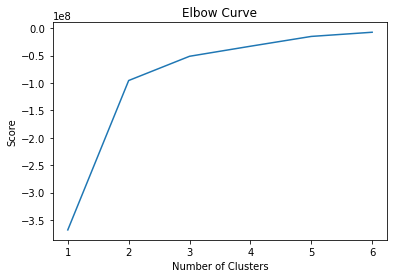

In [12]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

elbow bends at 3, indicating that 3 clusters will be optimal for this k-means analysis

In [13]:
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [14]:
kmeans.fit(df)

C:\Users\jadep\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\jadep\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [16]:
df.head()

Unnamed: 0  female  male  grand total  total victims  forced labour  \
0           0       0    97           97             97             97   
1           1      22     0           22             22              0   
2           2     342     0          342            116              0   
3           3     523   940         1463            822            606   
4           4      23     0           23             23              0   

   sexual exploit  clusters  
0               0         0  
1               0         0  
2             116         0  
3             307         0  
4              23         0

In [17]:
df['clusters'].value_counts()

0    27
1     3
2     1
Name: clusters, dtype: int64

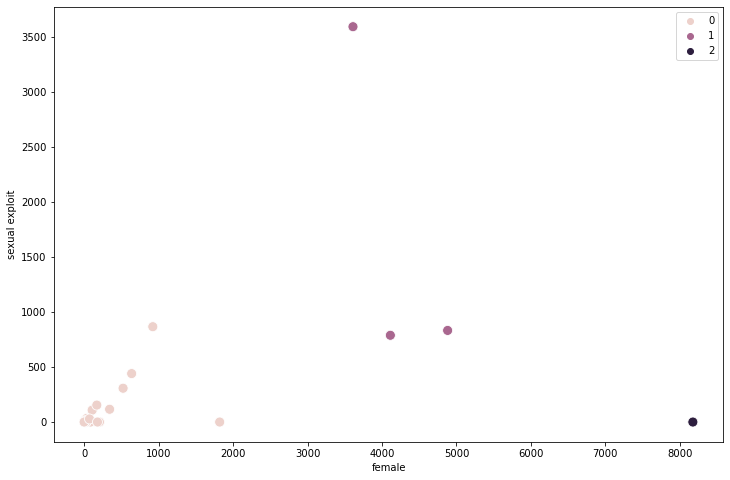

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['female'], y=df['sexual exploit'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('female') # Label x-axis.
plt.ylabel('sexual exploit') # Label y-axis.
plt.show()

As the number of female vicitms increases, the number of incidences of sexual exploitation increase for the light purple group. For the dark purple group, there is no increase in sexual exploitation as the number of female victims increases. Human trafficking of women is often perceived to be for sexual exploitation alone, this data clearly challenges that assumption.

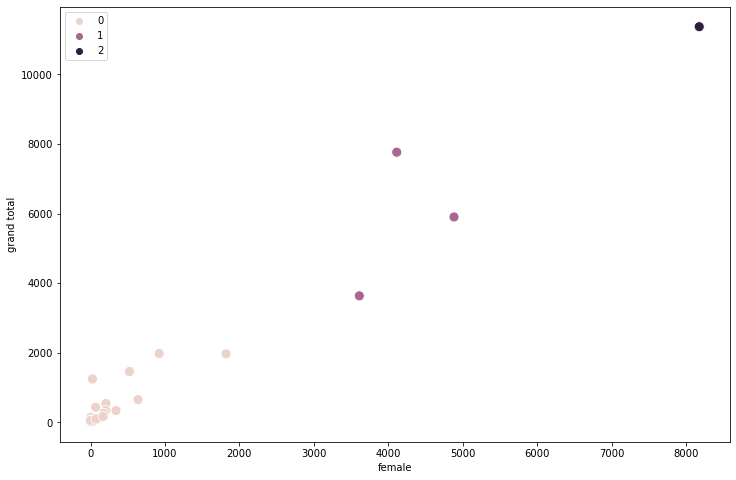

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['female'], y=df['grand total'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('female') # Label x-axis.
plt.ylabel('grand total') # Label y-axis.
plt.show()

As would be expected, as the number of female victims increases, the number of total victims is also increasing. Women still compose the largest sector of human trafficking victims. It would beinteresting to conduct further analyses into why women are more likely to become a victim (do they fight back less, are they more socially conditioned to be controlled in that way, is there an economic factor that drives women into positions that make them more susceptible to being trafficked?)

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['grand total'], y=df['female'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('grand total') # Label x-axis.
plt.ylabel('female') # Label y-axis.
plt.show()

this represents the same plot as above but with the variables reversed and shows a better relationship between the change in total victims as related to number of female victims.

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total victims'], y=df['sexual exploit'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('total victims') # Label x-axis.
plt.ylabel('sexual exploit') # Label y-axis.
plt.show()

As the total number of victims increases, the total number of incidences of sexual exploitation tends to increase. There are significant instances where the increase in victims is not attributable to sexual exploitation.  

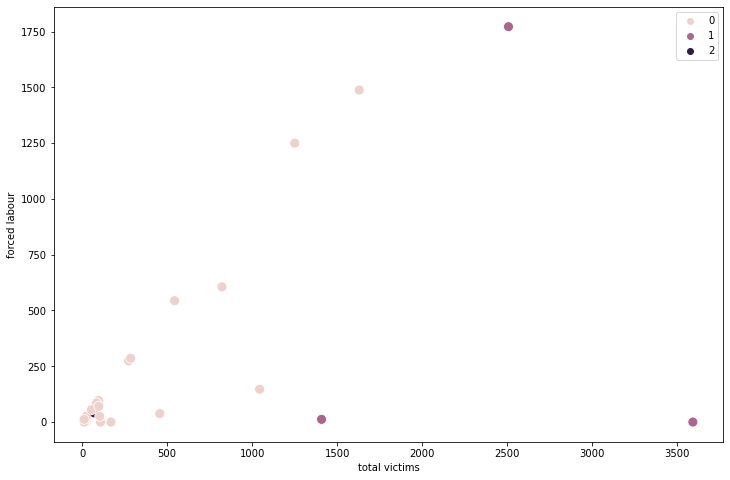

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total victims'], y=df['forced labour'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('total victims') # Label x-axis.
plt.ylabel('forced labour') # Label y-axis.
plt.show()

The relationship between the increased numbers of victims and the number of incidences of forced labor show a clear relationship here for the light purple group. The dark purple group also showing the relationship, but not as tightly. The prevalance of forced labor as an exploitation of human trafficking victims can not be understated. Public attention has been drawn to sexual exploitation far more than labor exploitation. Further analysis into why might include differences in male and female victims, differences in regions/countries of exploitations (child labor is treated differently across the globe). 

In [23]:
#statistical analysis of clusters
df.groupby('clusters').agg({'female':['mean','median'],'male':['mean','median'],'grand total':['mean','median'],'total victims':['mean','median'],'forced labour':['mean','median'],'sexual exploit':['mean','median']})

female                male          grand total         \
                 mean median         mean median          mean median   
clusters                                                                
0          207.111111     70   176.444444     19    383.555556    108   
1         4201.000000   4112  1565.000000   1020   5766.000000   5901   
2         8174.000000   8174  3191.000000   3191  11365.000000  11365   

         total victims        forced labour        sexual exploit         
                  mean median          mean median           mean median  
clusters                                                                  
0           275.777778     98    188.037037     27       81.37037      0  
1          2502.000000   2507    594.666667     12     1737.00000    832  
2            72.000000     72     41.000000     41        0.00000      0

Cluster 2 represents victims whose country of origin in the Phillipines, they compose the largest set of victims across the world. Correlation data with categorical data like country of origin was not conducted, but the results of these analyses would suggest that being from the Philippines increases your chances of being a victim of human trafficking. Further investigation into why such large numbers of victims come from the Philippines? Are victims being trafficked from the country itself or from abroad, are there social and economic structures within the Philippines that make it easier to victimize individuals? Are victims from the Philippines being trafficked domestically or are the exported to other countries? If they are exported, are there particular countries in which they end up?

In [24]:
df_2=pd.read_csv(os.path.join(path,'Data','HTworld clean.csv'),index_col=False
                )

In [25]:
df_2.head()

Unnamed: 0  Unnamed: 0.1  yearOfRegistration       Datasource  gender  \
0       36447         36447                2017  Case Management       0   
1       36448         36448                2017  Case Management       0   
2       36449         36449                2017  Case Management       0   
3       36450         36450                2017  Case Management       0   
4       36451         36451                2017  Case Management       0   

   ageBroad majorityStatus  majorityStatusAtExploit majorityEntry citizenship  \
0         0          Minor                        0            99          99   
1         0          Minor                        0            99          99   
2         0          Minor                       99            99          99   
3         0          Minor                       99            99          99   
4         0          Minor                       99            99          99   

   ...  typeOfSexPrivateSexualServices  typeOfSexConcatenated  isAbduction  \
0  ...                              99                     99           99   
1  ...                              99                     99           99   
2  ...                              99                     99           99   
3  ...                              99                     99           99   
4  ...                              99                     99           99   

   RecruiterRelationship  CountryOfExploitation  \
0                     99               Cambodia   
1                     99               Cambodia   
2                     99               Cambodia   
3                     99               Cambodia   
4                     99               Cambodia   

   recruiterRelationIntimatePartner  recruiterRelationFriend  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   recruiterRelationFamily  recruiterRelationOther  recruiterRelationUnknown  
0                        0                       0                         1  
1                        0                       0                         1  
2                        0                       0                         1  
3                        0                       0                         1  
4                        0                       0                         1  

[5 rows x 65 columns]

In [26]:
df_2.drop('Datasource',axis='columns',inplace=True)
df_2.drop('citizenship',axis='columns',inplace=True)
df_2.drop('CountryOfExploitation',axis='columns',inplace=True)
df_2.drop('meansOfControlConcatenated',axis='columns',inplace=True)
df_2.drop('typeOfExploitConcatenated',axis='columns',inplace=True)
df_2.drop('typeOfLabourConcatenated',axis='columns',inplace=True)
df_2.drop('typeOfSexConcatenated',axis='columns',inplace=True)



In [27]:
df_2.head()

Unnamed: 0  Unnamed: 0.1  yearOfRegistration  gender  ageBroad  \
0       36447         36447                2017       0         0   
1       36448         36448                2017       0         0   
2       36449         36449                2017       0         0   
3       36450         36450                2017       0         0   
4       36451         36451                2017       0         0   

  majorityStatus  majorityStatusAtExploit majorityEntry  \
0          Minor                        0            99   
1          Minor                        0            99   
2          Minor                       99            99   
3          Minor                       99            99   
4          Minor                       99            99   

   meansOfControlDebtBondage  meansOfControlTaKenyasEarnings  ...  \
0                         99                              99  ...   
1                         99                              99  ...   
2                         99                              99  ...   
3                         99                              99  ...   
4                         99                              99  ...   

   typeOfSexPornography  typeOfSexRemoteInteractiveServices  \
0                    99                                  99   
1                    99                                  99   
2                    99                                  99   
3                    99                                  99   
4                    99                                  99   

   typeOfSexPrivateSexualServices  isAbduction  RecruiterRelationship  \
0                              99           99                     99   
1                              99           99                     99   
2                              99           99                     99   
3                              99           99                     99   
4                              99           99                     99   

   recruiterRelationIntimatePartner  recruiterRelationFriend  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   recruiterRelationFamily  recruiterRelationOther  recruiterRelationUnknown  
0                        0                       0                         1  
1                        0                       0                         1  
2                        0                       0                         1  
3                        0                       0                         1  
4                        0                       0                         1  

[5 rows x 58 columns]

In [28]:
df_2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'yearOfRegistration', 'gender',
       'ageBroad', 'majorityStatus', 'majorityStatusAtExploit',
       'majorityEntry', 'meansOfControlDebtBondage',
       'meansOfControlTaKenyasEarnings',
       'meansOfControlRestrictsFinancialAccess', 'meansOfControlThreats',
       'meansOfControlPsychologicalAbuse', 'meansOfControlPhysicalAbuse',
       'meansOfControlSexualAbuse', 'meansOfControlFalsePromises',
       'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'isForcedLabour', 'isSexualExploit',
       'isOtherExploit', 'isSexAndLabour', 'isForcedMarriage',
       'isForcedMilitary', 'isOrganRemoval', 'isSlaveryAndPr

In [29]:

df_2.drop('majorityEntry',axis='columns',inplace=True)

In [30]:
df_2.drop('RecruiterRelationship',axis='columns',inplace=True)

In [31]:
df_2.head()

Unnamed: 0  Unnamed: 0.1  yearOfRegistration  gender  ageBroad  \
0       36447         36447                2017       0         0   
1       36448         36448                2017       0         0   
2       36449         36449                2017       0         0   
3       36450         36450                2017       0         0   
4       36451         36451                2017       0         0   

  majorityStatus  majorityStatusAtExploit  meansOfControlDebtBondage  \
0          Minor                        0                         99   
1          Minor                        0                         99   
2          Minor                       99                         99   
3          Minor                       99                         99   
4          Minor                       99                         99   

   meansOfControlTaKenyasEarnings  meansOfControlRestrictsFinancialAccess  \
0                              99                                      99   
1                              99                                      99   
2                              99                                      99   
3                              99                                      99   
4                              99                                      99   

   ...  typeOfSexProstitution  typeOfSexPornography  \
0  ...                     99                    99   
1  ...                     99                    99   
2  ...                     99                    99   
3  ...                     99                    99   
4  ...                     99                    99   

   typeOfSexRemoteInteractiveServices  typeOfSexPrivateSexualServices  \
0                                  99                              99   
1                                  99                              99   
2                                  99                              99   
3                                  99                              99   
4                                  99                              99   

   isAbduction  recruiterRelationIntimatePartner  recruiterRelationFriend  \
0           99                                 0                        0   
1           99                                 0                        0   
2           99                                 0                        0   
3           99                                 0                        0   
4           99                                 0                        0   

   recruiterRelationFamily  recruiterRelationOther  recruiterRelationUnknown  
0                        0                       0                         1  
1                        0                       0                         1  
2                        0                       0                         1  
3                        0                       0                         1  
4                        0                       0                         1  

[5 rows x 56 columns]

In [32]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [33]:
df_2.drop('majorityStatus',axis='columns',inplace=True)

In [34]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

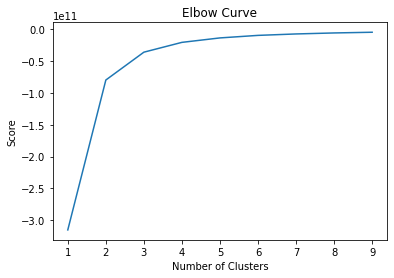

In [35]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [36]:
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [37]:
kmeans.fit(df_2)

C:\Users\jadep\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [38]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\jadep\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [39]:
df_2['clusters'].value_counts()

0    4121
2    4121
1    4112
Name: clusters, dtype: int64

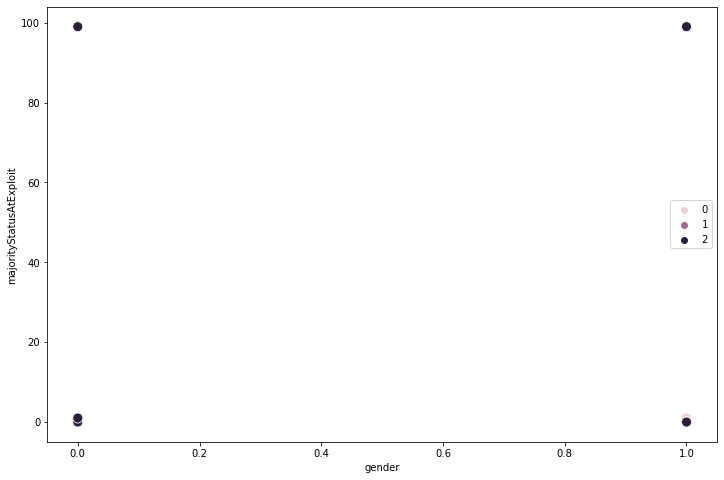

In [40]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['gender'], y=df_2['majorityStatusAtExploit'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('gender') # Label x-axis.
plt.ylabel('majorityStatusAtExploit') # Label y-axis.
plt.show()

world data of 0,1 entries does not provide enough data variaton to create a k-means plot that allows for any analysis